<h1><center><font size="6"> Titanic: Detailed Feature Engineering, Encoding and Modeling</font></center></h1>

<h2><center><font size="4"> Titanic: Machine Learning from Disaster </font></center></h2>

<img src="https://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1920&url=http%3A%2F%2Fd254andzyoxz3f.cloudfront.net%2F0419160-titanic-real-time-hero.jpg" width="600"></img>

<br>


In this kernel I am solving Titanic competition - dataset for beginners on Kaggle. 
The solution provided in this kernel achieved 81.8% on the public leaderboard. The main objective of this kernel is to provide tutorial on feature engineering, encoding, data cleaning stretegies and basic model tuning. I hope you will like it. 

#### Why this kernel is useful?

This kernel describes:
- theoretical strategies and knowledge from multiple resources and books (with provided links)
- feature engineering and preparation for different model types  
- how to choose best performing model   
- different strategies for missing values imputation   
- different strategies for feature encoding with pros and cons  
- why leaderboard score is different from crossvalidation and how to deal with it  


#### <font color="Blue"><b> Thank you for your vote. Please, let me know if you find any misstakes in this Kernel, I will gladly correct them 




## Table of contents
> ***
- [Introduction](#introduction)
- [Resources and useful links](#links)
- [Part 1: Importing Libraries](#Importing_Libraries)
- [Part 2: Importing Dataset](#Importing_Dataset)
- [Part 3: Explore Dataset](#Explore_Dataset)
- [Part 4: Explore Target Variable](#target)
- [Part 5: Explore and Engineer Features](#features)
    - [5.1. Filling Missing Values](#miss)
        - [5.1.1. Missing Values: Fare and Embarked](#fare)
        - [5.1.2. Missing Values:Age](#age)
    - [5.2. Features with High Cardinality](#cardinal)
        - [5.2.1. PassengerId](#pass)
        - [5.2.2. Ticket](#ticket)
        - [5.2.3. Cabin](#cabin)
        - [5.2.4. Name](#name)
    - [5.3. Features with Outliers](#outliers)
    - [5.4. Features with Rare values](#rare)
        - [5.4.1.Rare values: Parch and SibSp](#parch)  
        - [5.4.2. Rare values: Pclass, Sex, Embarked](#pclass)
    - [5.5. Predict Missing Age with KernelRidge](#miss_age) 
    - [5.6. Feature Correlation and Dependencies](#correlation)
- [Part 6: Feature Encoding](#encoding)
    - [6.1. One-hot Encoder](#onehot)
    - [6.2. Label Encoder](#label)
    - [6.3. Mean Encoder](#mean)
    - [6.4. Frequency Encoder](#frequency)
- [Part 7: Modeling](#modeling)
    - [7.1. Random Forest](#RF)
    - [7.2. Gradient Boosting](#GB)
    - [7.3. KNN](#KNN)
    - [7.4. SVC](#SVC)
- [Part 8: Conclusions](#conc)    
- [Part 9: Submission](#submission)   

## Introduction
<a id="introduction"></a>

#### Objective

Predictr survival on Titanic 

#### Description of the challenge
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Resources and useful links
<a id="links"></a>

#### Handle  Missing Data:
1. Missing-data imputation [link](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)
2. How to Handle Missing Data [link](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

#### Feature Engineering:
1. Discover Feature Engineering, How to Engineer Features and How to Get Good at It [link](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)
2. Machine Learning with Kaggle: Feature Engineering [link](https://www.datacamp.com/community/tutorials/feature-engineering-kaggle)
3. Categorical Data [link](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63)

#### Modeling:
1. Top 10 Machine Learning Algorithms [link](https://www.dezyre.com/article/top-10-machine-learning-algorithms/202)
2. Should I normalize/standardize/rescale the data [link](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html)    
3. Efficient Back Prop [link](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

#### Awesome books:
1. An Introduction to Statistical Learning [link](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf)
2. The Elements of Statistical Learning [link](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

#### Kaggle Kernels:
1. Introduction to Ensembling/Stacking in Python [link](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)
2. A Comprehensive ML Workflow with Python [link](https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python)
3. How am I doing with my score? [link](https://www.kaggle.com/pliptor/how-am-i-doing-with-my-score)
 

## Part 1: Importing Libraries
<a id="Importing_Libraries"></a>


In [1]:
import pandas as pd
import numpy as np

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import string
import math
import sys

# disable warnings:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


# Part 2: Importing Dataset
<a id="Importing_Dataset"></a>

In [2]:
#axtract data into Dataframe
data_train = pd.read_csv("../input/train.csv")
data_test= pd.read_csv("../input/test.csv")

<a id="Explore_Dataset"></a>
# Part 3: Explore Dataset

In [3]:
print("Training Data shape:", data_train.shape)
print("Test Data shape:", data_test.shape)

Training Data shape: (891, 12)
Test Data shape: (418, 11)


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Training dataset has 891 examples with 11 features and 1 target label in column 'Survived' 
- Test dataset has 418 samples with same 11 features as training set. And as expected it doesn't have survived column 
- Some columns have missing values

In [6]:
# extract target variable from train set
label = data_train['Survived']

In [7]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. There are 5 object features: Name, Sex, Ticket, Cabin and Embarked. 
    - Two of them: Cabin and Ticket are mixed type (numbers+ string)
    - Sex is binary category
    - Embarked is category
    - Name is text

2. There are 6 numeric features: Pclass, Age, PassengerID, SibSp, Parch, Fare. 
    - Age and Fare are continuous 
    - Pclass is ordinal category
    - SibSp and Parch are discrete ordinal

3. Target: Survived is binary categorical

<a id="target"></a>
# Part 4: Explore Target Variable

In [8]:
# check for unique values of labels:
label.unique()

array([0, 1])

In [9]:
#check for missing values:
if label.isnull().sum()==0:
    print("No missing values")
else:
    print(label.isnull().sum(), 'missing values found in dataset')

No missing values


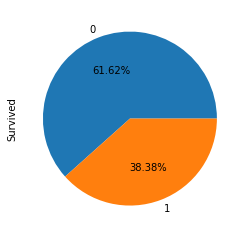

In [10]:
# Historgam
label.value_counts().plot.pie(autopct='%1.2f%%')

- Survived is binary category with 2 possible values: 1 - if person survived and 0 - if not
- 61.6% of people did not survive in titanic catastrophy

<a id="features"></a>
# Part 5: Explore and Engineer Features

In [11]:
# Check info for train and test dataset
data_train.info()
print("----------------------------------")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null objec

- There are a lot of missing values in Cabin column
- more than 200 missing values in Age column 
- couple of missing values in Fare and Embarked columns. 

In [12]:
# check how many unique values each feature has:
for column in data_train.columns:
    print(column, len(data_train[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


- Features PassengerId, Name, Ticket and Cabin are cardinal as they are categorical and have a lot of unique values
- Age and Fare have a lot of unique values as well, but it is natural for continues numeric features
- Survived and sex are binary categories
- Pclass is ordinal category
- Embarked is non-ordinal category
- SibSp and Parch are discreat counts

<a id="miss"></a>
## 5.1: Filling Missing Values

In the dataset Age, Embarked, Fare and Cabin features have missing values.  
There are miltiple ways to deal with missing values in dataset and chosen strategy highly depends on type feature type, amount of missing values, size of dataset and etc.  

Possible solutions to deal with missing values in continues variables:

1. Complete Case Analysis CCA (discard observations where any value is missing in any variable) 
    -doesn't work if there are many features missing or on small datasets
2. Mean and median imputation (substitute missing values with mean feature value (for Gaussian features) and median (if a variable is not Gaussian) 
    - normally good strategy if data is missing completely at random
    - but if there is a dependency between why data is missing and target it is better to additionally create a separate variable to capture NAs
    - changes the original distribution of variable and can distort covariance with other variables --> if too much can influence prediction in a negative way
3. Random sampling imputation (to fill NAs - take a random observation from available observation)
    - preserves the original distribution of data, but can create randomness - treatment of the same sample differently or unfair
4. Adding a separate variable to capture NAs 
    - useful in situations when data is not missing at random and there is some connection on why data is missing with a target or other variables
    - expands feature space as creates an additional feature 
5. End of distribution imputation (replace NAs with values that are at the far end of the distribution)
    - shows the importance of missingness
    - but if missingness is not important can mask predictive power and distorts the original distribution
6. Arbitrary value imputation (substitute with value away from other values in the variable -999, 999)
    - captures the importance of missing value
    - but creates outlier (it doesn't matter for trees)
7. Build a model to impute missing values: KNN, linear regression, etc.
    - a very good estimate of missing data
    - but it can be a problem because prediction usually is too good and doesn't match reality

Possible solutions to deal with missing values in categorical variables: 
1. CCA 
    - for pros and cons refer above
2. Random sample imputation
3. Adding a separate variable to capture NAs
4. Adding a separate category to capture NAs

For more details on this topic refer to:   
1. [Missing-data imputation](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)
2. [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

<a id="fare"></a>
### 5.1.1: Missing values: Fare and Embarked

In [13]:
# check variable Age for missing values:
print('Amount of missing data in Fare for train:', data_train.Fare.isnull().sum())
print('Amount of missing data in Fare for test:',data_test.Fare.isnull().sum())
print("--------------------------------------------------")
# check variable Age for missing values:
print('Amount of missing data in Embarked for train:',data_train.Embarked.isnull().sum())
print('Amount of missing data in Embarked for test:', data_test.Embarked.isnull().sum())

Amount of missing data in Fare for train: 0
Amount of missing data in Fare for test: 1
--------------------------------------------------
Amount of missing data in Embarked for train: 2
Amount of missing data in Embarked for test: 0


Amount of missing data in both columns is insignificant. We will just fill them with most frequent value for Embarked and median value for Fare

In [14]:
data_train['Embarked'] = data_train['Embarked'].fillna("S") 
data_test['Fare'] = data_test['Fare'].fillna(data_train['Fare'].median())

<a id="age"></a>
### 5.1.2: Missing values: Age

In [15]:
data_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Maximum age is 80, and minimum age is 0.42, consequntly there is no unusual values for this variable.

In [16]:
# check variable Age for missing values:
print(data_train.Age.isnull().sum())
print(data_test.Age.isnull().sum())

177
86


Age feature has 177 missing values in train and 86 missing values in test set. 
In order to understand which missing value imputation strategy to choose, we need to need to answer some questions about variable Age:  
1. Are values in variabe Age missing at random? - if not, it is useful to have feature to capture information in which rows Age is missing
2. We will choose 2 different strategies to capture missing values and compare model performance for them: mean/median imputation and build models to impute missing values. This 2 strategies are very different from each other:
    - Mean/median imputation is easy and works well, however it distorts original variance of variable and covarience of variable with other features
    - Building a model to predict values is normally a very good estimate of missing values, however, it tends to give too perfect values for real situation. It results in unrealistic prediction due to standard error is deflation.


In [17]:
# 1. create feature to show rows with missing values of age:
data_train['Age_NA'] =np.where(data_train.Age.isnull(), 1, 0)
data_test['Age_NA'] =np.where(data_test.Age.isnull(), 1, 0)

0    714
1    177
Name: Age_NA, dtype: int64


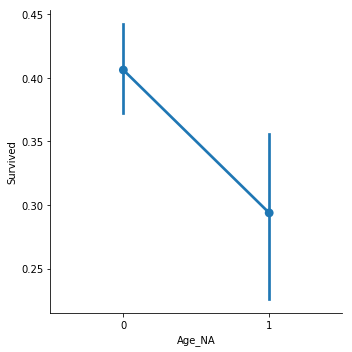

In [18]:
# # visualize Age_NA vs survival rate
print(data_train["Age_NA"].value_counts())
sns.factorplot('Age_NA','Survived', data=data_train)

According to the plot survival rate for people with missing Age is lower than for people that have age value. This information is representative as there is enough samples for both cases: 714 and 177, therefore we will keep Age_NA variable for future use. 

Skew for train data: 0.38910778230082704


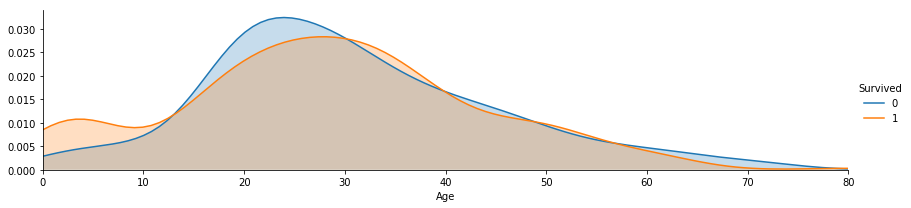

In [19]:
# 2. plot distribution of available Age vs survival rate
a = sns.FacetGrid(data_train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data_train['Age'].max()))
a.add_legend()

print('Skew for train data:',data_train.Age.skew())

data is a almost normal, we will fill missing values with mean

In [20]:
# create feature where missing age is imputed with mean of age values that are not missing
data_train['Age_mean'] =np.where(data_train.Age.isnull(), data_train['Age'].mean(), data_train['Age'])
data_test['Age_mean'] =np.where(data_test.Age.isnull(), data_test['Age'].mean(), data_test['Age'])


Skew for train data: 0.38910778230082704


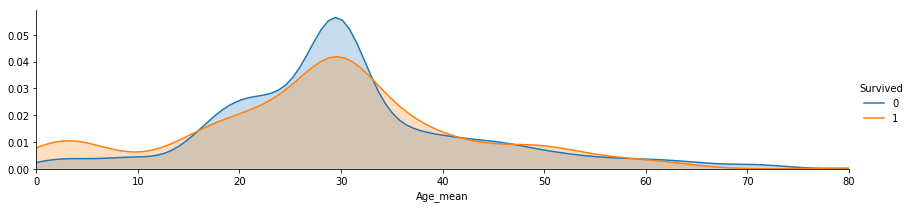

In [21]:
# plot distribution of available Age_mean vs survival rate
a = sns.FacetGrid(data_train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age_mean', shade= True )
a.set(xlim=(0 , data_train['Age_mean'].max()))
a.add_legend()

print('Skew for train data:',data_train.Age.skew())

As expected, after we filled missing values with the mean disctribution of Age variable has changed.   
To avoid this phenomenon we will use prediction model to predict missing values of Age from other available variables. To constract the model we will need to use other features from dataset. As we didn't preprocessed other features yet, we will do it in section 5.6 of this chapter.  



<a id="cardinal"></a>
## 5.2. Features with High Cardinality

Features with high cardinality (a lot of categories) are very challenging for modeling and normally they are dropped prior to training. However, there can be some useful infomation hidden inside this features.   

In [22]:
# check how many unique values each feature has:
for column in data_train.columns:
    print(column, len(data_train[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 3
Age_NA 2
Age_mean 89


Features PassengerId, Name, Ticket and Cabin are features with high cardinality. Normally this features can be dropped from dataset, however, sometimes they have usefull information hidden, and before dropping them, we need to extract this information.  
Hypothesis:
1. PassengerId can be dropped as it is unique and represents ID for each passenger. Hypothesis: there is no hidden information
2. Cabin:
    - cabin_type (letter before number) infomation is most probably related with deck. Hypothesis: People on lower deck could potentially have less probability to survive. 
    - Cabin has also a lot of missing values. This can be also connected with survival rate. Hypothesis: people who did not survive could not provide information about cabin
3. Ticket:
    - ticket_type could potentantially be connected with survival rate. Hypothesis: ticket type can have hidden information about passenger status
4. Name:
    - title. Hypothesis: can have hidden information about passenger status. For example married women could have more chances to survive than single man
    - family survival rate: a lot of people survived from specific family increases chances of person from same family to survive.

<a id="pass"></a>
### 5.2.1. PassengerID

In [23]:
data_train = data_train.drop(['PassengerId'], axis=1)
data_test = data_test.drop(['PassengerId'], axis=1)

In [24]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


<a id="ticket"></a>
### 5.2.2. Ticket

In [25]:
data_train.Ticket[:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

1. Variable in column Ticket has following structure:  
    - ticket type : A/5, PC, etc.  Not every ticket has associated type
    - ticket number: starting from 0 to 3101317. For most of the tickets first number is associated with Pclass, except tickets that are less than 5 digits long or tickets than have ticket type associated with them. There is not much additional information in ticket number, so it can be ommited

#### Create variable ticket_type:

In [26]:
#create function that takes ticket feature and returns list of ticket_types
def ticket_sep(data_ticket):
    ticket_type = []

    for i in range(len(data_ticket)):

            ticket =data_ticket.iloc[i]

            for c in string.punctuation:
                ticket = ticket.replace(c,"")
                splited_ticket = ticket.split(" ")   
            if len(splited_ticket) == 1:
                ticket_type.append('NO')
            else: 
                ticket_type.append(splited_ticket[0])
    return ticket_type 

In [27]:
# for train data create new column with ticket_type:
data_train["ticket_type"] = ticket_sep(data_train.Ticket)

data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,A5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,PC
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,STONO2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,NO
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,NO


In [28]:
# for test data create new column with ticket_type:
data_test["ticket_type"]= ticket_sep(data_test.Ticket)

data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,34.5,NO
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,NO
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,62.0,NO
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,27.0,NO
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0,NO


NO         665
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
SOC          6
STONO2       6
C            5
FCC          5
SCParis      4
PP           3
SOPP         3
WEP          3
SCAH         3
SWPP         2
PPP          2
SOTONO2      2
CASOTON      1
SOP          1
SC           1
FC           1
SCOW         1
SCA4         1
Fa           1
SP           1
AS           1
Name: ticket_type, dtype: int64


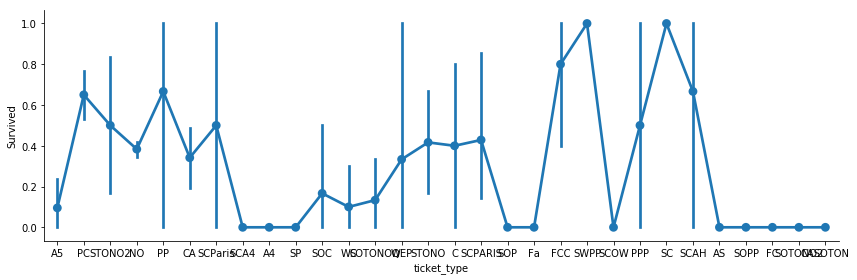

In [29]:
# check how many samples are there for each ticket type and visualize:
print(data_train["ticket_type"].value_counts())
sns.factorplot('ticket_type','Survived', data=data_train,size=4,aspect=3)


We can see that according to the plot there are too many ticket types that are not representative. It happens because of too less unique values for each type. In order to make data representative we will put all ticket types in train data that have less than 15 samples into separate type 'OTHER_T'. For test set we will also only leave ticket types that are left in training set and keep the rest under 'OTHER_T' type

In [30]:
# for those types that have less than 15 samples in training set, assign type to 'OTHER':

for t in data_train['ticket_type'].unique():
    if len(data_train[data_train['ticket_type']==t]) < 15:
        data_train.loc[data_train.ticket_type ==t, 'ticket_type'] = 'OTHER_T'
       
    
for t in data_test['ticket_type'].unique():
    if t not in data_train['ticket_type'].unique():
        data_test.loc[data_test.ticket_type ==t, 'ticket_type'] = 'OTHER_T'
        
print(data_train['ticket_type'].unique())
print(data_test['ticket_type'].unique())

['A5' 'PC' 'OTHER_T' 'NO' 'CA' 'SOTONOQ']
['NO' 'OTHER_T' 'PC' 'A5' 'CA' 'SOTONOQ']


NO         0.746352
OTHER_T    0.099888
PC         0.067340
CA         0.046016
A5         0.023569
SOTONOQ    0.016835
Name: ticket_type, dtype: float64


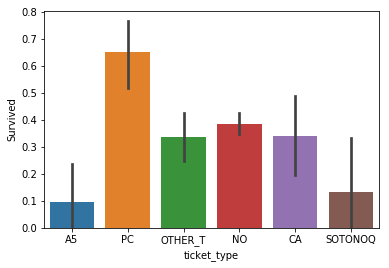

In [31]:
# visualize ticket_type vs survival rate
print(data_train["ticket_type"].value_counts()/len(data_train))
sns.barplot(x = 'ticket_type', y = 'Survived', data = data_train)

From the graph it is visible that there is some pattern in probability of survival based on ticket type:
- Passengers with PC ticket_type have higher probability to survive, and with A5 or SOTONOQ - lower probability to survive than average. 
- As A5 and SOTONOQ have similar distributions and are 'rare' categories, we can combine then together

In [32]:
# where ticket_type is 'SOTONOQ' convert it to 'A5'
data_train["ticket_type"] = np.where(data_train["ticket_type"]=='SOTONOQ', 'A5', data_train["ticket_type"])
data_test["ticket_type"] = np.where(data_test["ticket_type"]=='SOTONOQ', 'A5', data_test["ticket_type"])


NO         0.746352
OTHER_T    0.099888
PC         0.067340
CA         0.046016
A5         0.040404
Name: ticket_type, dtype: float64


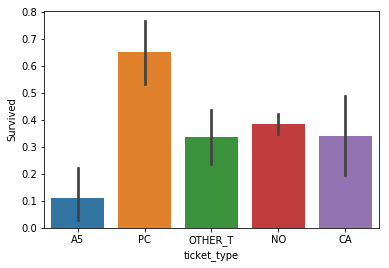

In [33]:
# visualize ticket_type vs survival rate
print(data_train["ticket_type"].value_counts()/len(data_train))
sns.barplot(x = 'ticket_type', y = 'Survived', data = data_train)

In [34]:
# drop Ticket from dataset:

data_train = data_train.drop(['Ticket'], axis=1)
data_test = data_test.drop(['Ticket'], axis=1)

<a id="cabin"></a>
### 5.2.3. Cabin

In [35]:
print('Missing values in Train set:', data_train.Cabin.isnull().sum())
print('Missing values in Test set:', data_test.Cabin.isnull().sum())

Missing values in Train set: 687
Missing values in Test set: 327


In [36]:
data_train.Cabin[:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

1. Variable Cabin has a lot of missing values both in train and test set. As there are a lot of missing values it worth to separate missing values from all other cabin types and check how it relates with other variables and target.


2. Variable in column Cabin has following structure:  
    - deck : Letter in front of number 
    - cabin number 
Deck probably has impact on survival rate. 

#### Create 'cabin_type' feature

In [37]:
#create function that takes cabin from dataset and extracts cabin type for each cabin that is not missing.
# If cabin is missing, leaves missing value:

def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('NaN') 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

In [38]:
# apply cabin sep on test and train set:
data_train['cabin_type'] = cabin_sep(data_train.Cabin)
data_test['cabin_type'] = cabin_sep(data_test.Cabin)


data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type,cabin_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,22.0,A5,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,38.0,PC,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,26.0,OTHER_T,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,35.0,NO,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,35.0,NO,NaN


NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: cabin_type, dtype: int64


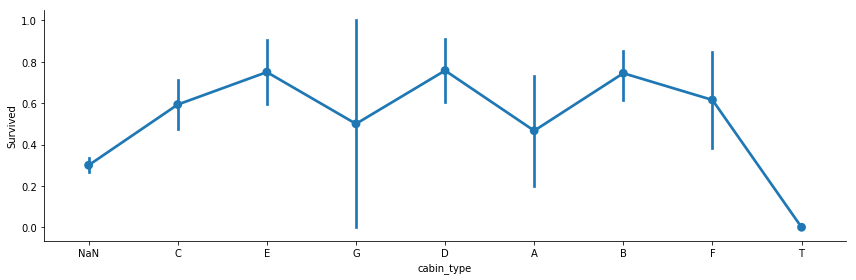

In [39]:
# visualize cabin_type vs survival rate:
print(data_train["cabin_type"].value_counts())
sns.factorplot('cabin_type','Survived', data=data_train,size=4,aspect=3)


In order to make data representative we will put all cabin types in train data that have less tan 15 samples into separate type 'OTHER_C'. For test set we will also only leave cabin types that are left in training set and keep the rest under 'OTHER_C' type

In [40]:
# for those types that have less than 15 samples in training set, assign type to 'OTHER_C':

for t in data_train['cabin_type'].unique():
    if len(data_train[data_train['cabin_type']==t]) <= 15:
        data_train.loc[data_train.cabin_type ==t, 'cabin_type'] = 'OTHER_C'
       
    
for t in data_test['cabin_type'].unique():
    if t not in data_train['cabin_type'].unique():
        data_test.loc[data_test.cabin_type ==t, 'cabin_type'] = 'OTHER_C'
        
print(data_train['cabin_type'].unique())
print(data_test['cabin_type'].unique())

['NaN' 'C' 'E' 'OTHER_C' 'D' 'B']
['NaN' 'B' 'E' 'OTHER_C' 'C' 'D']


NaN        0.771044
C          0.066218
B          0.052750
OTHER_C    0.037037
D          0.037037
E          0.035915
Name: cabin_type, dtype: float64


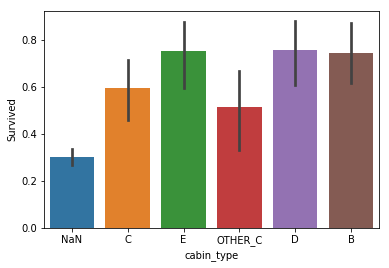

In [41]:
# visualize cabin_type vs survival rate
print(data_train["cabin_type"].value_counts()/len(data_train))
sns.barplot(x = 'cabin_type', y = 'Survived', data = data_train)

In [42]:
# drop cabin from dataset:

data_train = data_train.drop(['Cabin'], axis=1)
data_test = data_test.drop(['Cabin'], axis=1)

<a id="name"></a>
### 5.2.4. Name

In [43]:
data_train.Name[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Feature 'Name' has following structure:   
Family name--> "," --> Title --> Name --> "(" --> some name in bracket.  
We will separate this into new features and drop Name as it is high cardinal feature.


In [44]:
# Create function that take name and separates it into title, family name and deletes all puntuation from name column:
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brakets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]
        
        #remove punctuations accept brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()
            
        families.append(family)
        titles.append(title)
        new_name.append(name)
            
    return families, titles, new_name    

In [45]:
# apply name_sep on train and test set:
data_train['family'], data_train['title'], data_train['Name']  = name_sep(data_train.Name)
data_test['family'], data_test['title'], data_test['Name'] = name_sep(data_test.Name)

data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,family,title
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Braund,Mr
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Cumings,Mrs
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Heikkinen,Miss
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Futrelle,Mrs
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Allen,Mr


#### Title

Hypothesis: There is some correlation in title with survival rate

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
the           1
Lady          1
Jonkheer      1
Capt          1
Sir           1
Mme           1
Don           1
Ms            1
Name: title, dtype: int64


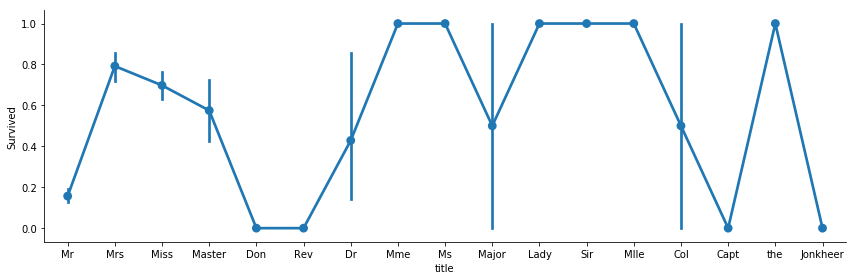

In [46]:
# check how many samples we have for each title and visualize vs survival rate:
print(data_train["title"].value_counts())
sns.factorplot('title','Survived', data=data_train,size=4,aspect=3)

In order to make data representative we will put all title in train data that have less than 15 samples into separate type 'OTHER'. For test set we will also only leave titles that are left in training set and keep the rest under 'OTHER' type

In [47]:
# for those types that have less than 15 samples in training set, assign type to 'OTHER':

for t in data_train['title'].unique():
    if len(data_train[data_train['title']==t]) <= 15:
        data_train.loc[data_train.title ==t, 'title'] = 'OTHER'
       
    
for t in data_test['title'].unique():
    if t not in data_train['title'].unique():
        data_test.loc[data_test.title ==t, 'title'] = 'OTHER'
        
print(data_train['title'].unique())
print(data_test['title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']
['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']


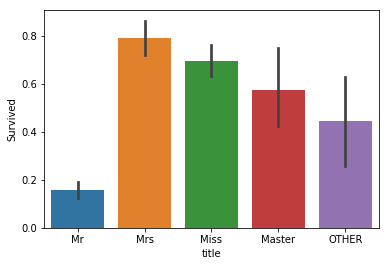

In [48]:
# visualize title vs survival rate:
sns.barplot(x = 'title', y = 'Survived', data = data_train)


According to the plot there is definatelly correlation between survival rate and title. Most of this correlation comes from gender, however, gender information provides less information by itself. For example Mrs and Miss have the same gender, but it is visible that Mrs has higher survival rate than Miss. It is very logical, as Mrs probably had priorities to board surviving boats because they had children with them.

#### Family:

We can see that there are a lot of family names in dataset. Before proceeding with preprocessing of this variable lets check how useful it is. First we will check if there are overlapping family names in train and test set, and if there are unique family names only for train or only for test set. 

In [49]:
# amount of overlapping family names in train and test set:
len([x for x in data_train.family.unique() if x in data_test.family.unique()])

144

In [50]:
# amount of non overlapping with test set unique family names in train set:
len([x for x in data_train.family.unique() if x not in data_test.family.unique()])

523

In [51]:
# amount of non overlapping with train set unique family names in test set:
len([x for x in data_test.family.unique() if x not in data_train.family.unique()])

208

1. There are 144 overlapping family names in train and test set
2. There are 523 family names that are unique in train seat that not overlapping with test set
3. there are 208 family names that are unique in test set and not overlapping with train set

This kind of variable is introducing noise rather than information and in machine learning model using this variable may tend to overfit. However, if survival rate for certain family is high in training set, it can influence probability of survival for person belonging to this family from test set. 
Let's look  at 144 families that overlap:

In [52]:
#create a list with all overlapping families
overlap = [x for x in data_train.family.unique() if x in data_test.family.unique()]

In [53]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,family,title
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Braund,Mr
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Cumings,Mrs
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Heikkinen,Miss
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Futrelle,Mrs
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Allen,Mr


In [54]:
# introduce new column to data called family_size:
data_train['family_size'] = data_train.SibSp + data_train.Parch +1
data_test['family_size'] = data_test.SibSp + data_test.Parch +1

# calculate survival rate for each family in train_set:
rate_family = data_train.groupby('family')['Survived', 'family','family_size'].median()
rate_family.head()

,Survived,family_size
family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0
Adahl,0.0,1.0
Adams,0.0,1.0


In [55]:
# if family size is more than 1 and family name is in overlap list 
overlap_family ={}
for i in range(len(rate_family)):
    if rate_family.index[i] in overlap and  rate_family.iloc[i,1] > 1:
        overlap_family[rate_family.index[i]] = rate_family.iloc[i,0]

For all family names in test and train set that are not in overlap_family dictionary, we will keep family survival rate as train dataset mean survival rate, and for those families that are in dataset we will set family survival rate as the one we have calculated in overlap_family dictionary. Also to signalize that dataset is not overlapping we will make a separate varibale 'Family_survival_rate_NA'

In [56]:
mean_survival_rate = np.mean(data_train.Survived)
family_survival_rate = []
family_survival_rate_NA = []

for i in range(len(data_train)):
    if data_train.family[i] in overlap_family:
        family_survival_rate.append(overlap_family[data_train.family[i]])
        family_survival_rate_NA.append(1)
    else:
        family_survival_rate.append(mean_survival_rate)
        family_survival_rate_NA.append(0)
        
data_train['family_survival_rate']= family_survival_rate
data_train['family_survival_rate_NA']= family_survival_rate_NA

In [57]:
# repeat the same for test set:
mean_survival_rate = np.mean(data_train.Survived)
family_survival_rate = []
family_survival_rate_NA = []

for i in range(len(data_test)):
    if data_test.family[i] in overlap_family:
        family_survival_rate.append(overlap_family[data_test.family[i]])
        family_survival_rate_NA.append(1)
    else:
        family_survival_rate.append(mean_survival_rate)
        family_survival_rate_NA.append(0)
data_test['family_survival_rate']= family_survival_rate
data_test['family_survival_rate_NA']= family_survival_rate_NA

In [58]:
# drop name and family from dataset:
data_train = data_train.drop(['Name', 'family'], axis=1)
data_test = data_test.drop(['Name', 'family'], axis=1)

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Mr,1,0.383838,0


<a id="outliers"></a>
## 5.3. Features with Outliers

Outliers can shift decision boundry for linear models significanlty, thats why is it inportant to handle them. Tree models are not sensitive for ourliers, but shifting outliers will not effect them in any way, so we will perform shifting for all models.  
There are only 3 features that can potentially have outliers: Fare, Age and Age_mean. We will make box plots for Age and Fare to check if they have outliers. 

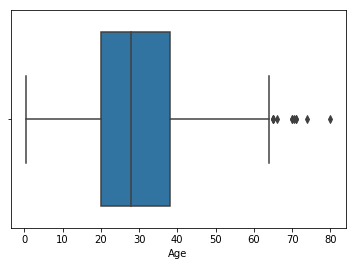

In [59]:
sns.boxplot(data_train.Age)

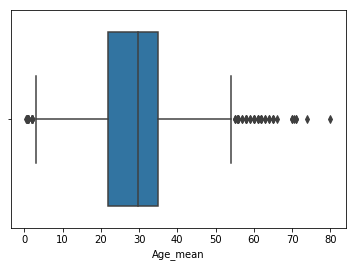

In [60]:
sns.boxplot(data_train.Age_mean)

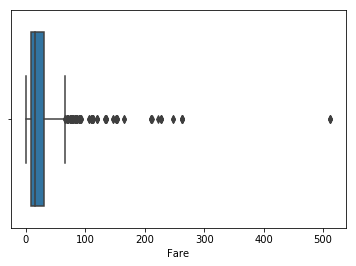

In [61]:
sns.boxplot(data_train.Fare)

All features have outliers. It can be dangerous for linear models.  
The way to handle ourliers depends on distribution type. If disctribution is close to normal --> bound values within 3*std range, but if disctribution is skewed --> bound between 3*IQR range. 

We already know that Age is close to normal. We will check Fare and Age_mean:

In [62]:
print('Skew for Fare:',data_train.Fare.skew())
print('Skew for Age_mean:',data_train.Fare.skew())

Skew for Fare: 4.787316519674893
Skew for Age_mean: 4.787316519674893


Fare and Age_mean arde highly skewed. We will use IQR for both variables

In [63]:
# calculate upper bound for Fair
IQR = data_train.Fare.quantile(0.75) - data_train.Fare.quantile(0.25)
upper_bound = data_train.Fare.quantile(0.75) + 3*IQR
# for train and test sets convert all values in column Fair where age is more than upper_bound to upper_bound:
data_train.loc[data_train.Fare >upper_bound, 'Fare'] = upper_bound 
data_test.loc[data_test.Fare >upper_bound, 'Fare'] = upper_bound

max(data_train.Fare)

100.2688

In [64]:
# calculate upper bound for Age_mean
IQR = data_train.Age_mean.quantile(0.75) - data_train.Age_mean.quantile(0.25)
upper_bound = data_train.Age_mean.quantile(0.75) + 3*IQR
# for train and test sets convert all values in column Fair where age is more than upper_bound to upper_bound:
data_train.loc[data_train.Age_mean >upper_bound, 'Age_mean'] = upper_bound 
data_test.loc[data_test.Age_mean >upper_bound, 'Age_mean'] = upper_bound

max(data_train.Age_mean)

74.0

In [65]:
# calculate upper bound for Age:
upper_bound = data_train.Age.mean() + 3* data_train.Age.std()
# for train and test sets convert all values in column Fair where age is more than upper_bound to upper_bound:
data_train.loc[data_train.Age >upper_bound, 'Age'] = upper_bound 
data_test.loc[data_test.Age >upper_bound, 'Age'] = upper_bound

max(data_train.Age)

73.27860964406095

<a id="rare"></a>
## 5.4. Features with Rare values

Rare values in categorical variables tend to overfit models, especially it is true for tree models. A big number of infrequent labels adds noise with little info. Moreover there are values that can only appear in train or in test set. If category appears only in test set, tree model will not know what to do with this category, as it was not trained to handle it. 

We dropped high cardinal features already, so the only features we are interested in are Pclass, Sex, SibSp, Parch, and Embarked

In [66]:
# 1. check if all values from test set are in train set 
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns:
    print(column)
    print(data_train[column].unique())
    print(data_test[column].unique())
    

Pclass
[3 1 2]
[3 2 1]
Sex
['male' 'female']
['male' 'female']
SibSp
[1 0 3 4 2 5 8]
[0 1 2 3 4 5 8]
Parch
[0 1 2 5 3 4 6]
[0 1 3 2 4 6 5 9]
Embarked
['S' 'C' 'Q']
['Q' 'S' 'C']


<a id="parch"></a>
### 5.4.1. Rare values: Parch and SibSp

We can see that there is one unique value of 9 in test set for Parch. We will create separate variable family_size in order to overcome this issue.    
Hypothesis: family size is more representative feature vs survival rate, rather then by Parch and SibSp separatelly. 

In [67]:
# check if all values from test set are in train set for family_size:
print(data_train['family_size'].unique())
print(data_test['family_size'].unique())

[ 2  1  5  3  7  6  4  8 11]
[ 1  2  3  5  4  6  8  7 11]


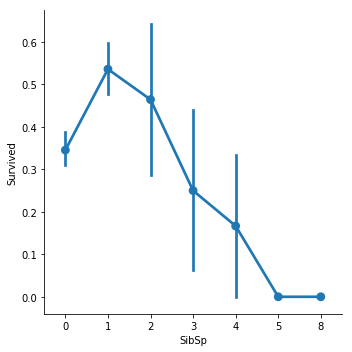

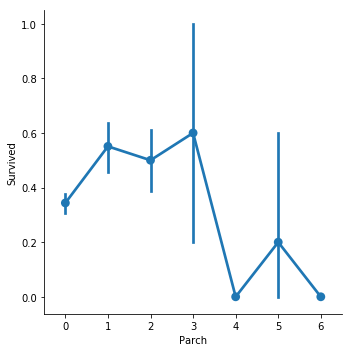

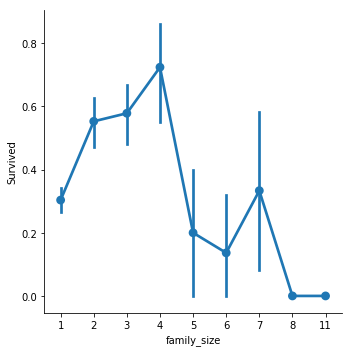

In [68]:
# visualize SibSp, Parch and family size vs survival rate:
sns.factorplot('SibSp','Survived', data=data_train)
sns.factorplot('Parch','Survived', data=data_train)
sns.factorplot('family_size','Survived', data=data_train)

Indeed, according to plots we can see that combining SibSp and Parch features together is better than to have them separatelly. Family size has much less variability, but still maintains proper correlation with survival rate 

In [69]:
# check family size for rare lables:
print(data_train["family_size"].value_counts()/len(data_train))

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: family_size, dtype: float64


<a id="pclass"></a>
### 5.4.2. Rare values: Pclass, Sex, Embarked

In [70]:
print('Pclass')
print(data_train["Pclass"].value_counts()/len(data_train))
print(data_test["Pclass"].value_counts()/len(data_train))
print("------------------------------")

print('Sex')
print(data_train["Sex"].value_counts()/len(data_train))
print(data_test["Sex"].value_counts()/len(data_train))
print("------------------------------")

print('Embarked')
print(data_train["Embarked"].value_counts()/len(data_train))
print(data_test["Embarked"].value_counts()/len(data_train))
print("------------------------------")

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
3    0.244669
1    0.120090
2    0.104377
Name: Pclass, dtype: float64
------------------------------
Sex
male      0.647587
female    0.352413
Name: Sex, dtype: float64
male      0.298541
female    0.170595
Name: Sex, dtype: float64
------------------------------
Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64
S    0.303030
C    0.114478
Q    0.051627
Name: Embarked, dtype: float64
------------------------------


No rare labels in Embarked, Sex and Pclass categories

<a id="miss_age"></a>
## 5.5. Predict Missing Age with KernelRidge

In [71]:
# combine train and test dataset
data = pd.concat([data_train.drop(['Survived'], axis=1), data_test], axis =0, sort = False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Mr,2,0.383838,0
1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,3,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Mrs,2,0.383838,0
4,3,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Mr,1,0.383838,0


In [72]:
# encode variables into numeric labels
le = LabelEncoder()

columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'title']

for col in columns:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,22.0,0,4,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,0,38.0,4,1,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,0,26.0,3,4,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,0,35.0,2,1,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,0,35.0,2,4,2,1,0.383838,0


In [73]:
# drop columns that have information about age or are strongly correlated with other features
data = data.drop(['Age_mean', 'Age_NA'], axis =1)

In [74]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,4,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,4,1,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,3,4,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,2,1,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,2,4,2,1,0.383838,0


In [75]:
sum(data.Age.isnull())

263

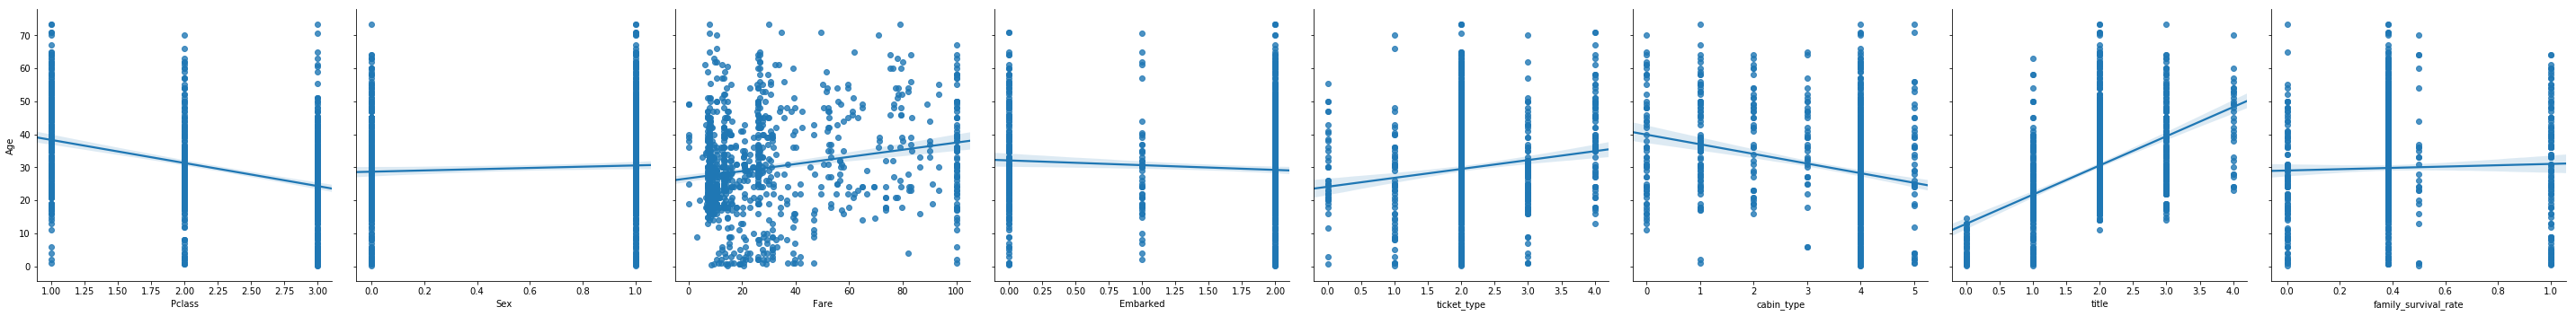

In [76]:
sns.pairplot(data, x_vars= ['Pclass', 'Sex','Fare','Embarked','ticket_type','cabin_type',\
                            'title', 'family_survival_rate'], y_vars='Age', size = 5, kind='reg')

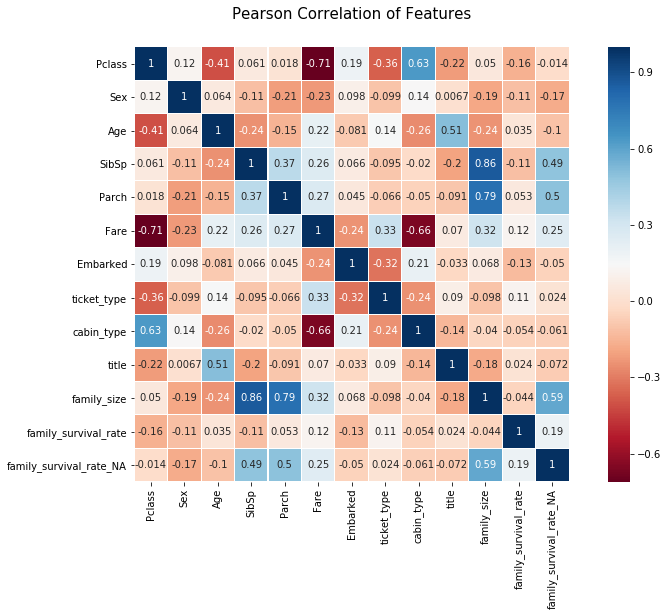

In [77]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

In [78]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,4,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,4,1,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,3,4,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,2,1,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,2,4,2,1,0.383838,0


In [79]:
x_train_age = data.dropna().drop(['Age'], axis =1)
y_train_age = data.dropna()['Age']

In [80]:
x_test_age = data[pd.isnull(data.Age)].drop(['Age'], axis =1)

parameters = {'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'linear'],
               'alpha' :[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              
             }

model_lin = KernelRidge()
search_lin = GridSearchCV(model_lin, parameters, n_jobs = -1, cv = 10, scoring = 'r2',verbose=1)
search_lin.fit(x_train_age, y_train_age)

In [81]:
model_lin = make_pipeline(StandardScaler(),KernelRidge())
kfold = model_selection.KFold(n_splits=10, random_state=4, shuffle = True)
#model_lin.get_params().keys()
parameters = {'kernelridge__gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernelridge__kernel': ['rbf', 'linear'],
               'kernelridge__alpha' :[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              
             }
search_lin = GridSearchCV(model_lin, parameters, n_jobs = -1, cv = kfold, scoring = 'r2',verbose=1)
search_lin.fit(x_train_age, y_train_age)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelridge', KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernelridge__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernelridge__kernel': ['rbf', 'linear'], 'kernelridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [82]:
print("Best parameters are:", search_lin.best_params_)
print("Best accuracy achieved:",search_lin.cv_results_['mean_test_score'].mean())

Best parameters are: {'kernelridge__alpha': 0.1, 'kernelridge__gamma': 0.01, 'kernelridge__kernel': 'rbf'}
Best accuracy achieved: -2.7306276740242406


In [83]:
y_test_age = search_lin.predict(x_test_age)

In [84]:
data.loc[data['Age'].isnull(), 'Age'] = y_test_age

In [85]:
data_train.shape[0]

891

In [86]:
idx = int(data_train.shape[0])
data_train['Age'] = data.iloc[:idx].Age
data_test['Age'] = data.iloc[idx:].Age

In [87]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Mr,1,0.383838,0


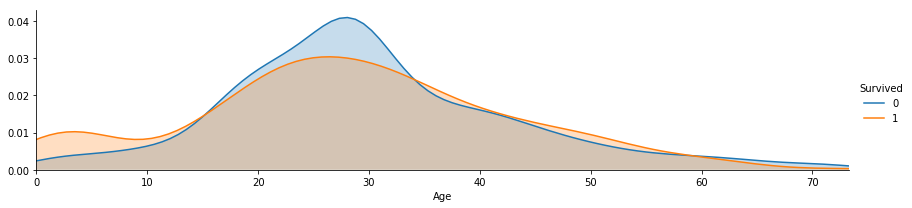

In [88]:
# plot distribution of available Age vs survival rate
a = sns.FacetGrid(data_train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data_train['Age'].max()))
a.add_legend()

As expected, the distribution of Age values filled with prediction model looks more similar to original disctribution than when we filled missing values with mean

<a id="correlation"></a>
## 5.6. Feature Correlation and Dependencies

In [89]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,NO,NaN,Mr,1,0.383838,0


Before constructing correlation matrix, we need to convert categorical features to number. We will do it using label encoder.

In [90]:
# encode 'cabin_type' into numeric labels
le = LabelEncoder()
data_train_LE = data_train.copy()
data_test_LE = data_test.copy()

columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'title']

for col in columns:
    le.fit(data_train_LE[col])
    data_train_LE[col] = le.fit_transform(data_train_LE[col])
    data_test_LE[col] = le.transform(data_test_LE[col])
    
data_train_LE.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,1,22.0,1,0,7.2500,2,0,22.0,0,4,2,2,0.383838,0
1,1,1,0,38.0,1,0,71.2833,0,0,38.0,4,1,3,2,1.000000,1
2,1,3,0,26.0,0,0,7.9250,2,0,26.0,3,4,1,1,0.383838,0
3,1,1,0,35.0,1,0,53.1000,2,0,35.0,2,1,3,2,0.383838,0
4,0,3,1,35.0,0,0,8.0500,2,0,35.0,2,4,2,1,0.383838,0


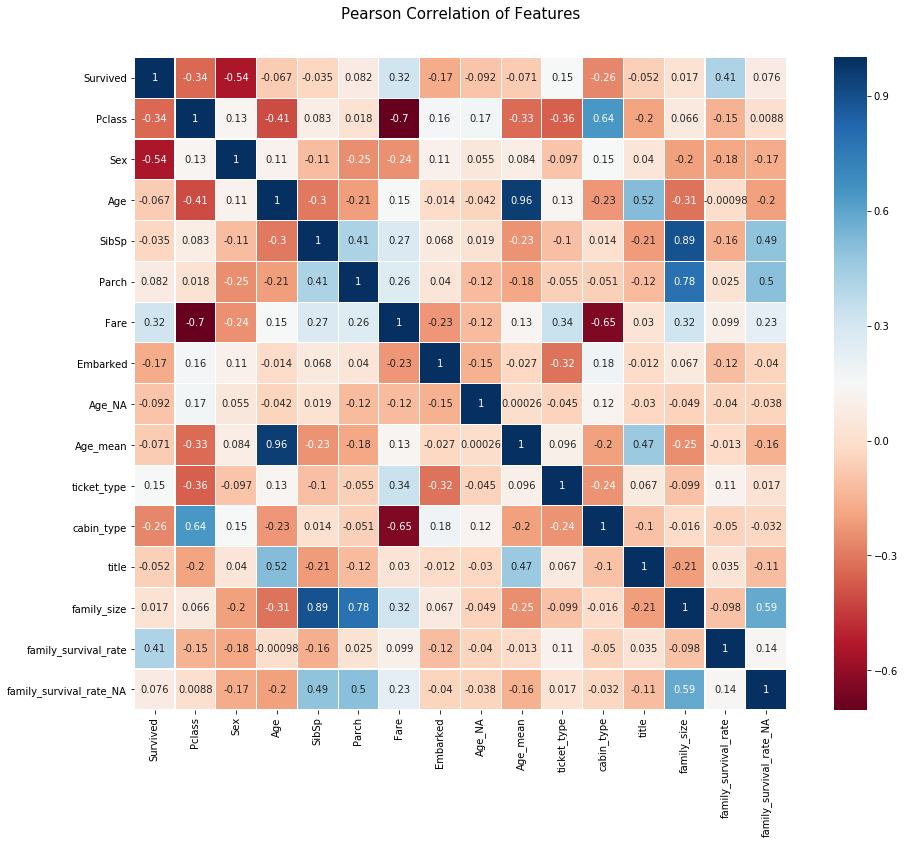

In [91]:
plt.figure(figsize=(17,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train_LE.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

According to correlation matrix:
1. As expected features Age and Age_mean are highly correlated between each other. We will drop Age as is has less correlation with Survived
2. SibSp and Parch are correlataed with family size, we will drop SipSp and Parch as discussed in the chapter 5.4.1 

In [92]:
data_train_LE.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_NA', 'Age_mean', 'ticket_type', 'cabin_type', 'title',
       'family_size', 'family_survival_rate', 'family_survival_rate_NA'],
      dtype='object')

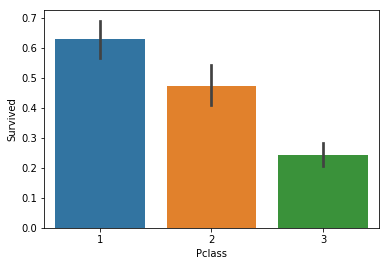

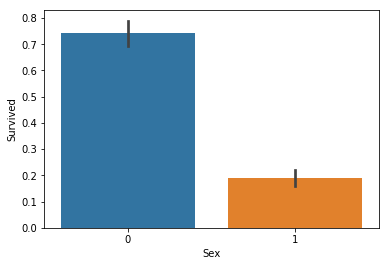

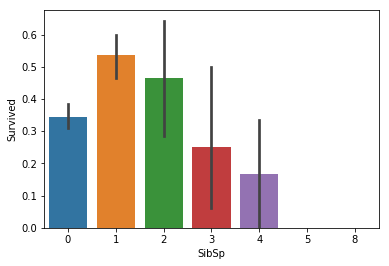

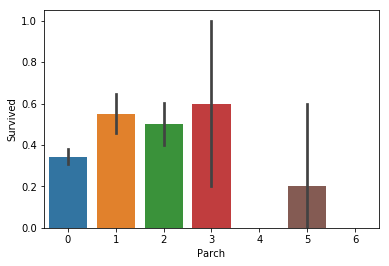

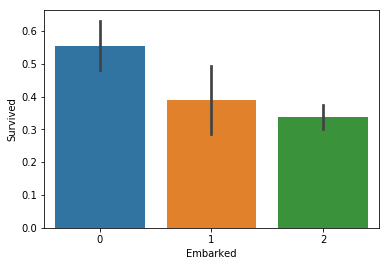

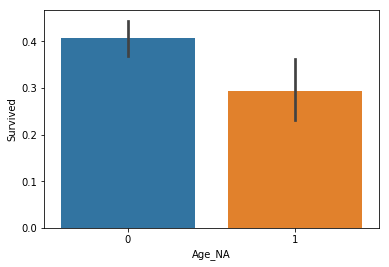

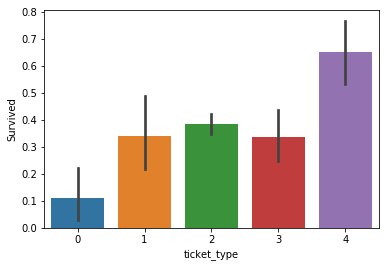

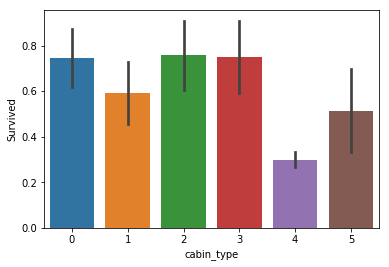

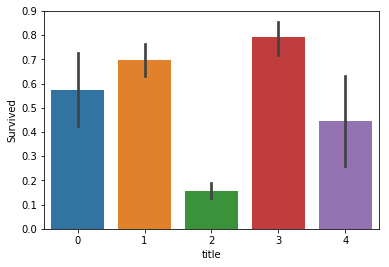

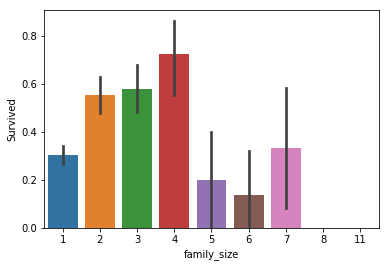

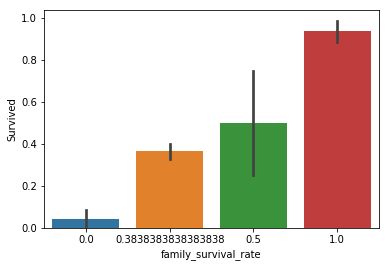

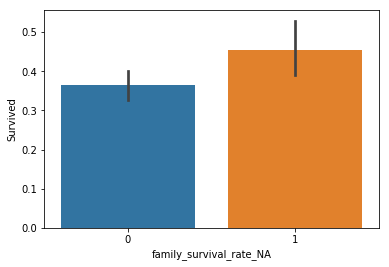

In [93]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked', 'Age_NA', 'ticket_type', 'cabin_type', 'title',
       'family_size', 'family_survival_rate', 'family_survival_rate_NA']:
    sns.barplot(x = col, y = 'Survived', data = data_train_LE)
    plt.show()

In [94]:
drop_col = ['Age_mean', 'SibSp', 'Parch']
data_train_LE = data_train_LE.drop(drop_col, axis=1)
data_test_LE = data_test_LE.drop(drop_col, axis=1)

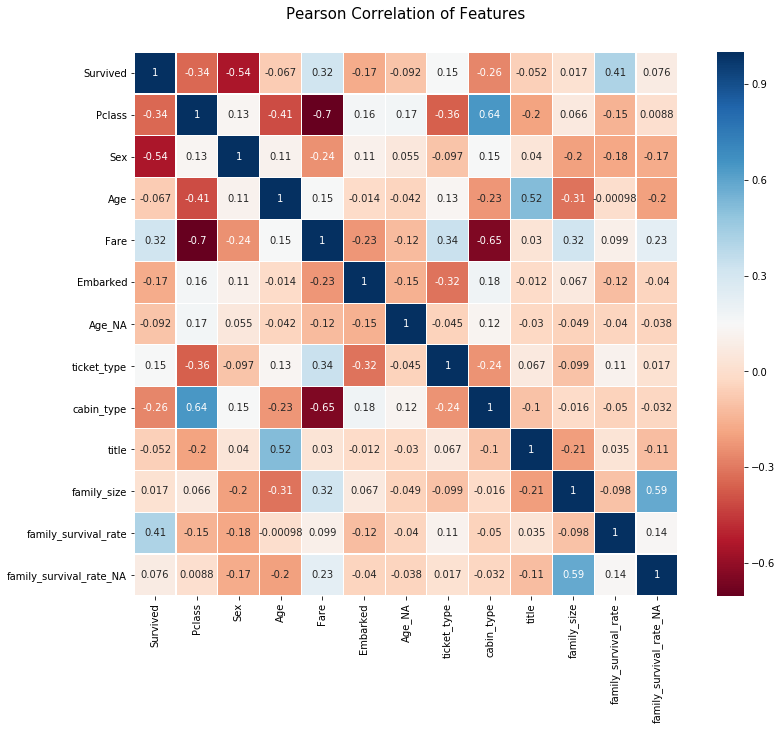

In [95]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train_LE.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

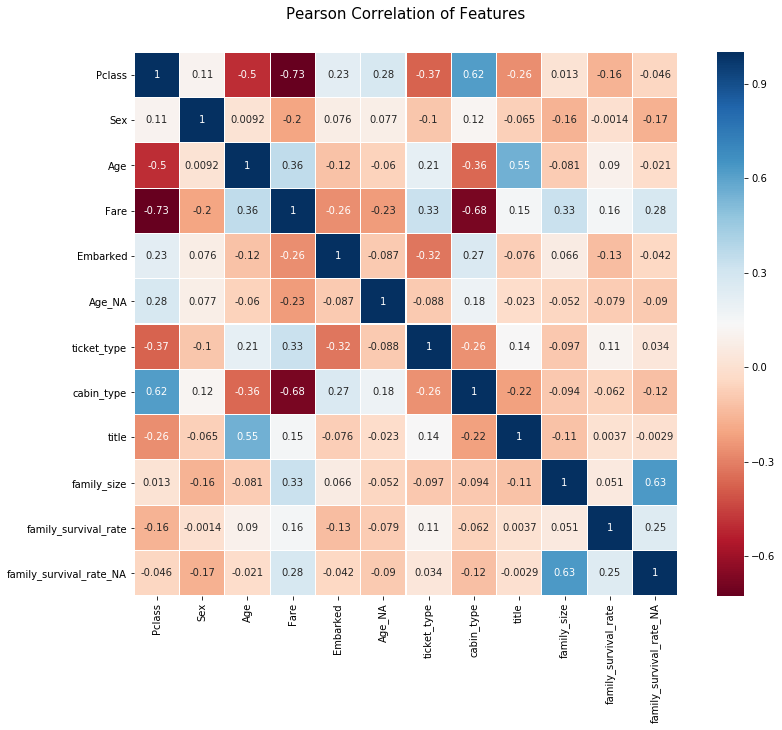

In [96]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_test_LE.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

<a id="encoding"></a>
# Part 6: Feature Encoding 

Performance of particular encoding strategy for categorical feratures depends on amount of instances and features in data set, variable type and chosen model.

There are multiple ways to perform encoding:

1. One-hot encoding:  
keeps all information about variable, but create a lot of new features  

2. Binary encoding:  
keeps all information about variable, creates new dimensions, but less than one-hot encoder        
             
3. Ordinal numbering encoding:    
keeps semantical info about variable, but treats 2-1 as 3-2 and can be missleading, doesn't create new dimensions  

4. Frequency encoding:  
doesn't create new dimensions, but depends on frequency rather than relation with target and that can lead to wrong predictions  

5. Target guided encoding: ordinal, mean, and probability ratio encoding, Weight of evidence:  
creates monotonic relationship between variable and target, but can cause overfitting   

All of this models have advantages and disadvantagies and performance of particular encoding strategy for categorical feratures depends on amount of instances and features in data set, variable type and chosen prediction model. For more information about this encoding strategies there are multiple research papers and useful tutorial for each of this strategies.

We will try 4 encoding strategies and  compare performance for each of them.

<a id="onehot"></a>
## 6.1. One-hot Encoder

In [97]:
X_train_onehot = data_train.drop(drop_col, axis=1)
X_test_onehot = data_test.drop(drop_col, axis=1)

In [98]:
X_train_onehot.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,7.2500,S,0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,71.2833,C,0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,7.9250,S,0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,53.1000,S,0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,8.0500,S,0,NO,NaN,Mr,1,0.383838,0


In [99]:
columns = ['cabin_type', 'title',  'Sex', 'Embarked', 'ticket_type', 'Pclass']

for col in columns:
    #X_train = pd.concat([X_train, pd.get_dummies(data_train[col])], axis =1)
    #X_test = pd.concat([X_test, pd.get_dummies(data_test[col])], axis =1)
    X_train_onehot = pd.concat([X_train_onehot, pd.get_dummies(X_train_onehot[col], drop_first = True)], axis =1)
    X_test_onehot = pd.concat([X_test_onehot, pd.get_dummies(X_test_onehot[col], drop_first = True)], axis =1)
    

In [100]:
X_train_onehot = X_train_onehot.drop(columns, axis=1)
X_test_onehot = X_test_onehot.drop(columns, axis=1)

In [101]:
X_train_onehot.head()

,Survived,Age,Fare,Age_NA,family_size,family_survival_rate,family_survival_rate_NA,C,D,E,NaN,OTHER_C,Miss,Mr,Mrs,OTHER,male,Q,S,CA,NO,OTHER_T,PC,2,3
0,0,22.0,7.2500,0,2,0.383838,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,1,38.0,71.2833,0,2,1.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,1,0.383838,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,1,35.0,53.1000,0,2,0.383838,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,35.0,8.0500,0,1,0.383838,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1


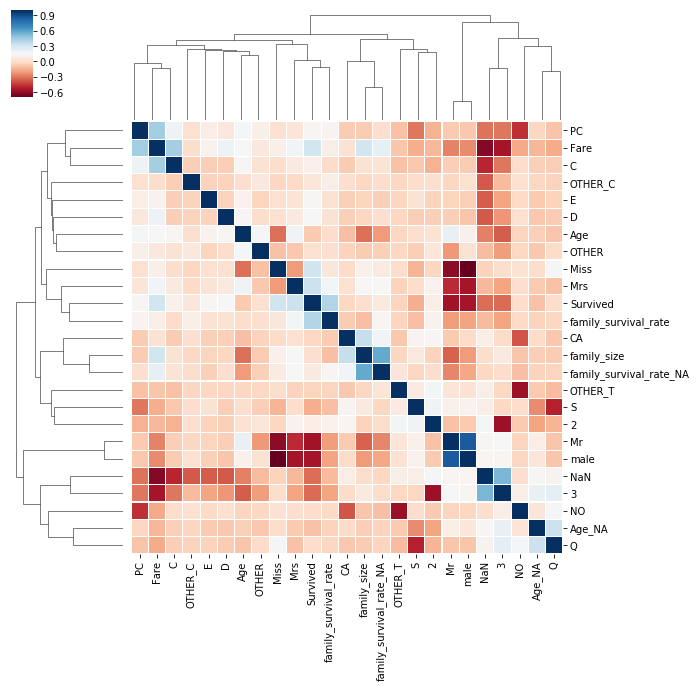

In [102]:
sns.clustermap(X_train_onehot.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap)

<a id="label"></a>
## 6.2. Label Encoder

In [103]:
X_train_lab = data_train.drop(drop_col, axis=1)
X_test_lab = data_test.drop(drop_col, axis=1)

In [104]:
X_train_lab.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,7.2500,S,0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,71.2833,C,0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,7.9250,S,0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,53.1000,S,0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,8.0500,S,0,NO,NaN,Mr,1,0.383838,0


In [105]:
# encode 'cabin_type' into numeric labels
le = LabelEncoder()
columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'title']

for col in columns:
    le.fit(data_train[col])
    X_train_lab[col] = le.transform(X_train_lab[col])
    X_test_lab[col] = le.transform(X_test_lab[col])
    
X_test_lab.head()

,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,3,1,34.5,7.8292,1,0,2,4,2,1,0.383838,0
1,3,0,47.0,7.0000,2,0,2,4,3,2,0.383838,0
2,2,1,62.0,9.6875,1,0,2,4,2,1,0.383838,0
3,3,1,27.0,8.6625,2,0,2,4,2,1,0.383838,0
4,3,0,22.0,12.2875,2,0,2,4,3,3,1.000000,1


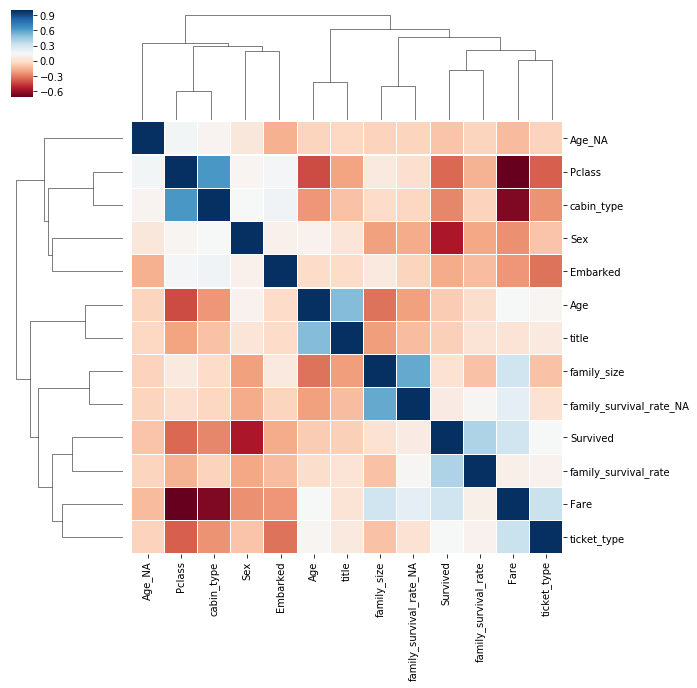

In [106]:
sns.clustermap(X_train_lab.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap)

<a id="mean"></a>
## 6.3. Mean Encoder

In [107]:
X_train_mean = data_train.drop(drop_col, axis=1)
X_test_mean = data_test.drop(drop_col, axis=1)

In [108]:
X_train_mean.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,7.2500,S,0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,71.2833,C,0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,7.9250,S,0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,53.1000,S,0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,8.0500,S,0,NO,NaN,Mr,1,0.383838,0


In [109]:
columns = ['cabin_type', 'title',  'Sex', 'Embarked', 'ticket_type']

for col in columns:
    ordered_labels = X_train_mean.groupby([col])['Survived'].mean().to_dict()
    X_train_mean[col] = X_train_mean[col].map(ordered_labels)
    X_test_mean[col] = X_test_mean[col].map(ordered_labels)

In [110]:
X_train_mean.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,0.188908,22.0,7.2500,0.339009,0,0.111111,0.299854,0.156673,2,0.383838,0
1,1,1,0.742038,38.0,71.2833,0.553571,0,0.650000,0.593220,0.792000,2,1.000000,1
2,1,3,0.742038,26.0,7.9250,0.339009,0,0.337079,0.299854,0.697802,1,0.383838,0
3,1,1,0.742038,35.0,53.1000,0.339009,0,0.383459,0.593220,0.792000,2,0.383838,0
4,0,3,0.188908,35.0,8.0500,0.339009,0,0.383459,0.299854,0.156673,1,0.383838,0


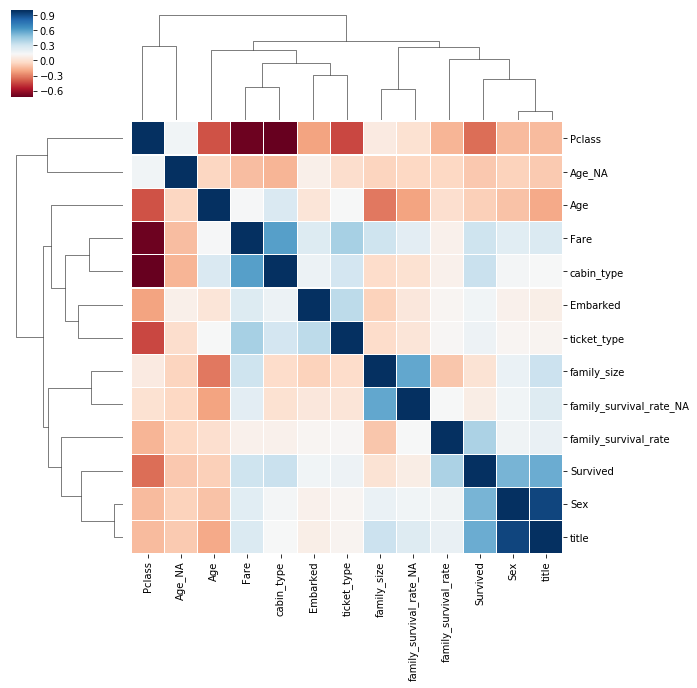

In [111]:
sns.clustermap(X_train_mean.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap)

<a id="frequency"></a>
## 6.4. Frequency encoder

In [112]:
X_train_freq = data_train.drop(drop_col, axis=1)
X_test_freq = data_test.drop(drop_col, axis=1)

In [113]:
X_train_freq.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,male,22.0,7.2500,S,0,A5,NaN,Mr,2,0.383838,0
1,1,1,female,38.0,71.2833,C,0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,7.9250,S,0,OTHER_T,NaN,Miss,1,0.383838,0
3,1,1,female,35.0,53.1000,S,0,NO,C,Mrs,2,0.383838,0
4,0,3,male,35.0,8.0500,S,0,NO,NaN,Mr,1,0.383838,0


In [114]:
columns = ['cabin_type', 'title',  'Sex', 'Embarked', 'ticket_type']

for col in columns:
    ordered_labels = X_train_freq[col].value_counts().to_dict()
    X_train_freq[col] = X_train_freq[col].map(ordered_labels)
    X_test_freq[col] = X_test_freq[col].map(ordered_labels)

In [115]:
X_train_freq.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_NA,ticket_type,cabin_type,title,family_size,family_survival_rate,family_survival_rate_NA
0,0,3,577,22.0,7.2500,646,0,36,687,517,2,0.383838,0
1,1,1,314,38.0,71.2833,168,0,60,59,125,2,1.000000,1
2,1,3,314,26.0,7.9250,646,0,89,687,182,1,0.383838,0
3,1,1,314,35.0,53.1000,646,0,665,59,125,2,0.383838,0
4,0,3,577,35.0,8.0500,646,0,665,687,517,1,0.383838,0


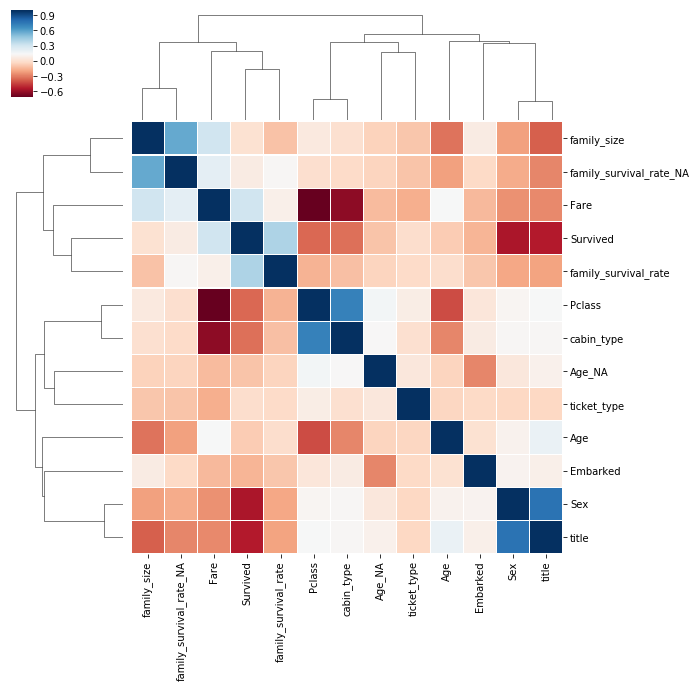

In [116]:
sns.clustermap(X_train_freq.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap)

<a id="model"></a>
# Part 7: Modeling

In [117]:
random_state = 4

In [118]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [119]:
#separate dataset into X_train and Y_train:
def separate(X_train):
    X = X_train.drop(columns= ['Survived'])
    Y = X_train['Survived']
    return X, Y

In [120]:
X_onehot, Y_onehot  = separate(X_train_onehot)
X_lab, Y_lab  = separate(X_train_lab)
X_mean, Y_mean  = separate(X_train_mean)
X_freq, Y_freq  = separate(X_train_freq)

In [121]:
# Modeling step Test differents algorithms 
random_state = 4
classifiers = []

classifiers.append(('SVC', make_pipeline(StandardScaler(),SVC(random_state=random_state))))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),\
                                                  random_state=random_state,learning_rate=0.1)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('GradientBoost', GradientBoostingClassifier(random_state=random_state)))
classifiers.append(('MPL', make_pipeline(StandardScaler(), MLPClassifier(random_state=random_state))))
classifiers.append(('KNN',make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))))

# evaluate each model 
results = []
names = []
for name, classifier in classifiers:
    kfold = model_selection.KFold(n_splits= 3, random_state=random_state, shuffle = True)
    cv_results = model_selection.cross_val_score(classifier, X_onehot, y = Y_onehot, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.820426 (0.022221)
DecisionTree: 0.773288 (0.041176)
AdaBoost: 0.792368 (0.023702)
RandomForest: 0.833895 (0.015632)
GradientBoost: 0.831650 (0.024435)
MPL: 0.821549 (0.021993)
KNN: 0.811448 (0.033445)


For further modeling we will chose four best performing models: SVC, Random Forest, Gradient Boost, and KNN

#### <font color="Blue"><b>Important Information 

After submitting first results to Kaggle I discovered that cross validation score is very different from results on public board. This is a known issue with Titanic dataset and there is a lot of information available to understand why it happens and how test set is divided into public and private. You can find more information on Titanic forum or here [link](https://www.kaggle.com/pliptor/how-am-i-doing-with-my-score)

To overcome this issue we will use public leaderboard score as additional validation score. We will submit results for each model + encoder pair and choose five best performing models to improve final result. This will provide better score on public and private leaderboards.

This strategy is not advisable for other competitions though, as result on private leaderboard can differ from results on public leaderboard. The general advice for future : trust your cross validation.

<a id="RF"></a>
## 7.1. Random Forest

In [122]:
def random_forest(X, Y, X_test):
    parameters = {'max_depth' : [2, 4, 5, 10], 
                  'n_estimators' : [200, 500, 1000, 2000], 
                  'min_samples_split' : [3, 4, 5], 

                 }
    kfold = model_selection.KFold(n_splits=3, random_state=random_state, shuffle = True)
    model_RFC = RandomForestClassifier(random_state = 4, n_jobs = -1)
    search_RFC = GridSearchCV(model_RFC, parameters, n_jobs = -1, cv = kfold, scoring = 'accuracy',verbose=1)
    search_RFC.fit(X, Y)
    predicted= search_RFC.predict(X_test)
    
    print("Best parameters are:", search_RFC.best_params_)
    print("Best accuracy achieved:",search_RFC.best_score_)
    
    return search_RFC.best_params_, model_RFC, search_RFC, predicted

In [123]:
param_RFC_onehot, model_RFC_onehot, search_RFC_onehot, predicted_cv_RFC_onehot = random_forest(X_onehot, Y_onehot, X_test_onehot)
param_RFC_lab, model_RFC_lab, search_RFC_lab, predicted_cv_RFC_lab = random_forest(X_lab, Y_lab, X_test_lab)
param_RFC_mean, model_RFC_mean, search_RFC_mean, predicted_cv_RFC_mean = random_forest(X_mean, Y_mean,  X_test_mean)
param_RFC_freq, model_RFC_freq, search_RFC_freq, predicted_cv_RFC_freq = random_forest(X_freq, Y_freq, X_test_freq)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.6min finished


Best parameters are: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 2000}
Best accuracy achieved: 0.8473625140291807
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.6min finished


Best parameters are: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 500}
Best accuracy achieved: 0.8473625140291807
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.7min finished


Best parameters are: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 2000}
Best accuracy achieved: 0.8507295173961841
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.7min finished


Best parameters are: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200}
Best accuracy achieved: 0.8507295173961841


After submiting each of this solution to Kaggle, discovered that cross validation scores are higher than on public leaderboard, meaning we are overfitting to training set. To make generalization better --> decrease max_depth and increased n_estimators to make model more general.

In [124]:
def fit_pred_RF(X, Y, X_test):

    model_RFC = RandomForestClassifier(max_depth =2,  min_samples_split =3, n_estimators = 5000,
                                     random_state = 4, n_jobs = -1)
    model_RFC.fit(X, Y)
    
    predicted= model_RFC.predict(X_test)
    
    return predicted, model_RFC


In [125]:
# predict lables for all encoding strategies:
predicted_RFC_onehot, model_RFC_onehot = fit_pred_RF(X_onehot, Y_onehot, X_test_onehot)
predicted_RFC_lab, model_RFC_lab = fit_pred_RF(X_lab, Y_lab, X_test_lab)
predicted_RFC_mean, model_RFC_mean = fit_pred_RF(X_mean, Y_mean, X_test_mean)
predicted_RFC_freq, model_RFC_freq = fit_pred_RF(X_freq, Y_freq, X_test_freq)

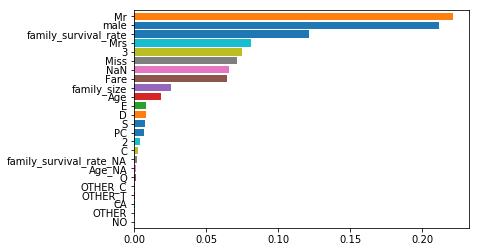

In [126]:
pd.Series(model_RFC_onehot.feature_importances_,X_onehot.columns).sort_values(ascending=True).plot.barh(width=0.8)

<a id="GB"></a>
## 7.2. Gradient Boosting 

In [127]:
def grad_boost(X, Y, X_test):

    parameters = {'max_depth' : [2, 4, 10, 15], 
                  'n_estimators' : [10, 50, 100], 
                  'min_samples_split' : [5, 10, 15],
                 }
    kfold = model_selection.KFold(n_splits=3, random_state=random_state, shuffle = True)
    model_GBC = GradientBoostingClassifier(random_state = 4)
    search_GBC = GridSearchCV(model_GBC, parameters, n_jobs = -1, cv = kfold, scoring = 'accuracy',verbose=1)
    search_GBC.fit(X, Y)
    predicted= search_GBC.predict(X_test)
    
    print("Best parameters are:", search_GBC.best_params_)
    print("Best accuracy achieved:",search_GBC.cv_results_['mean_test_score'].mean())
    
    return search_GBC.best_params_, model_GBC, search_GBC, predicted
    

In [128]:
param_GBC_onehot, model_GBC_onehot, search_GBC_onehot, predicted_cv_GBC_onehot = grad_boost(X_onehot, Y_onehot, X_test_onehot)
param_GBC_lab, model_GBC_lab, search_GBC_lab, predicted_cv_GBC_lab = grad_boost(X_lab, Y_lab, X_test_lab)
param_GBC_mean, model_GBC_mean, search_GBC_mean, predicted_cv_GBC_mean = grad_boost(X_mean, Y_mean, X_test_mean)
param_GBC_freq, model_GBC_freq, search_GBC_freq, predicted_cv_GBC_freq = grad_boost(X_freq, Y_freq, X_test_freq)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters are: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy achieved: 0.8207382466641726
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters are: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy achieved: 0.828625763810949
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters are: {'max_depth': 4, 'min_samples_split': 15, 'n_estimators': 50}
Best accuracy achieved: 0.8273475495697717
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters are: {'max_depth': 4, 'min_samples_split': 15, 'n_estimators': 50}
Best accuracy achieved: 0.8233258511036288


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.4s finished


Optimal parameters found during cross validation are lower than on public leaderboard, meaning we are overfitting to training set--> decrease max_depth and decrease n_estimators to make model more general.

In [129]:
def fit_pred_GBC(X, Y, X_test):

    model_GBC = GradientBoostingClassifier(max_depth = 2, min_samples_split = 15, n_estimators = 10,\
                                 random_state = 4, max_features= 'auto')
    model_GBC.fit(X, Y)
    
    predicted= model_GBC.predict(X_test)
    
    return predicted, model_GBC

In [130]:
# predict lables for all encoding strategies:
predicted_GBC_onehot, model_GBC_onehot = fit_pred_GBC(X_onehot, Y_onehot, X_test_onehot)
predicted_GBC_lab, model_GBC_lab = fit_pred_GBC(X_lab, Y_lab, X_test_lab)
predicted_GBC_mean, model_GBC_mean = fit_pred_GBC(X_mean, Y_mean, X_test_mean)
predicted_GBC_freq, model_GBC_freq = fit_pred_GBC(X_freq, Y_freq, X_test_freq)

<a id="KNN"></a>
## 7.3. KNN

In [131]:
def mod_KNN(X, Y, X_test):
    
    model_KNN=make_pipeline(MinMaxScaler(),KNeighborsClassifier())
    #KNN.get_params().keys()
    kfold = model_selection.KFold(n_splits=3, random_state=random_state, shuffle = True)
    parameters=[{'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9,10]}]
    search_KNN = GridSearchCV(estimator=model_KNN, param_grid=parameters, scoring='accuracy', cv=kfold)
    scores_KNN=cross_val_score(search_KNN, X, Y,scoring='accuracy', cv=kfold, verbose=1)
    search_KNN.fit(X, Y)
    predicted= search_KNN.predict(X_test)
    
    print("Best parameters are:", search_KNN.best_params_)
    print("Best accuracy achieved:",search_KNN.cv_results_['mean_test_score'].mean())
    
    return search_KNN.best_params_, model_KNN, search_KNN, predicted


In [132]:
param_KNN_onehot, model_KNN_onehot, search_KNN_onehot, predicted_cv_KNN_onehot = mod_KNN(X_onehot, Y_onehot, X_test_onehot)
param_KNN_lab, model_KNN_lab, search_KNN_lab, predicted_cv_KNN_lab = mod_KNN(X_lab, Y_lab, X_test_lab)
param_KNN_mean, model_KNN_mean, search_KNN_mean, predicted_cv_KNN_mean = mod_KNN(X_mean, Y_mean, X_test_mean)
param_KNN_freq, model_KNN_freq, search_KNN_freq, predicted_cv_KNN_freq = mod_KNN(X_freq, Y_freq, X_test_freq)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 10}
Best accuracy achieved: 0.8092031425364759


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 10}
Best accuracy achieved: 0.8254146402294551


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 9}
Best accuracy achieved: 0.8217982292056366


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 10}
Best accuracy achieved: 0.8299039780521261


Optimal parameters found during cross validation are lower than on public leaderboard, meaning we are overfitting to training set--> increase n-neighbors.

In [133]:
def fit_pred_KNN(X, Y, X_test):

    model_KNN = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=11))
    
    model_KNN.fit(X, Y)
    
    predicted= model_KNN.predict(X_test)
    
    return predicted, model_KNN

In [134]:
# predict lables for all encoding strategies:
predicted_KNN_onehot, model_KNN_onehot = fit_pred_KNN(X_onehot, Y_onehot, X_test_onehot)
predicted_KNN_lab, model_KNN_lab = fit_pred_KNN(X_lab, Y_lab, X_test_lab)
predicted_KNN_mean, model_KNN_mean = fit_pred_KNN(X_mean, Y_mean, X_test_mean)
predicted_KNN_freq, model_KNN_freq = fit_pred_KNN(X_freq, Y_freq, X_test_freq)

<a id="SVC"></a>
## 7.4. SVC

In [135]:
def mod_SVC(X, Y, X_test):

    model_SVC=make_pipeline(StandardScaler(),SVC(random_state=1))
    parameters=[{'svc__C': [0.0001,0.001,0.1,1, 10, 100], 
           'svc__gamma':[0.0001,0.001,0.1,1,10,50,100],
           'svc__kernel':['rbf'],
           'svc__degree' : [1,2,3,4]
          }]
    kfold = model_selection.KFold(n_splits=3, random_state=random_state, shuffle = True)
    search_SVC = GridSearchCV(estimator=model_SVC, param_grid = parameters, scoring='accuracy', cv=kfold)
    scores_SVC=cross_val_score(search_SVC, X, Y,scoring='accuracy', cv=kfold, verbose =1)
    search_SVC.fit(X, Y)
    predicted= search_SVC.predict(X_test)
    
    print("Best parameters are:", search_SVC.best_params_)
    print("Best accuracy achieved:",search_SVC.cv_results_['mean_test_score'].mean())
    
    return search_SVC.best_params_, model_SVC, search_SVC, predicted

In [136]:
param_SVC_onehot, model_SVC_onehot, search_SVC_onehot, predicted_cv_SVC_onehot = mod_SVC(X_onehot, Y_onehot, X_test_onehot)
param_SVC_lab, model_SVC_lab, search_SVC_lab, predicted_cv_SVC_lab = mod_SVC(X_lab, Y_lab, X_test_lab)
param_SVC_mean, model_SVC_mean, search_SVC_mean, predicted_cv_SVC_mean = mod_SVC(X_mean, Y_mean, X_test_mean)
param_SVC_freq, model_SVC_freq, search_SVC_freq, predicted_cv_SVC_freq = mod_SVC(X_freq, Y_freq, X_test_freq)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.6s finished


Best parameters are: {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.677409010742344


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.7s finished


Best parameters are: {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6794131794131794


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.1s finished


Best parameters are: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6857196301640746


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.9s finished


Best parameters are: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6841430174763508


In [137]:
def fit_pred_SVC(X, Y, X_test):

    model_SVC = make_pipeline(StandardScaler(),SVC(random_state=random_state, C= 1, gamma = 0.001, kernel = 'rbf', degree =1))
    
    model_SVC.fit(X, Y)
    
    predicted= model_SVC.predict(X_test)
    
    return predicted, model_SVC

In [138]:
# predict lables for all encoding strategies:
predicted_SVC_onehot, model_SVC_onehot = fit_pred_SVC(X_onehot, Y_onehot, X_test_onehot)
predicted_SVC_lab, model_SVC_lab = fit_pred_SVC(X_lab, Y_lab, X_test_lab)
predicted_SVC_mean, model_SVC_mean = fit_pred_SVC(X_mean, Y_mean, X_test_mean)
predicted_SVC_freq, model_SVC_freq = fit_pred_SVC(X_freq, Y_freq, X_test_freq)

<a id="conc"></a>
# Part 8: Conclusion

Top 5 models + encoding pairs achieved best results on public leaderboard are: 
    - Random forest with one-hot feature encoding 
    - Pipeline of MinMaxScaler and KNN with one hot feature encoding 
    - Pipeline of StandardScaling and SVC with frequency feature encoding
    - Random forest with mean feature encoding
    - Random forest with frequency feature encoding
Combination of this models together allows to achieve 0.81818 public score. 

<a id="submission"></a>
# Part 9: Submission

In [139]:
predicted = np.where(((predicted_SVC_mean + predicted_KNN_onehot+predicted_RFC_onehot+predicted_RFC_freq+ predicted_RFC_mean )/5) > 0.5, 1, 0)


In [140]:
test =pd.read_csv("../input/test.csv")
submission = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived':predicted})

submission.head()

filename = 'Titanic Predictions Public.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions Public.csv
